# **HUBBLEMIND MACHINE LEARNING INTERNSHIP**

## *Import all Libraries*

In [334]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## *Week One: Data-Cleaning Process*

In [381]:
def wrangle(filepath):
    data = pd.read_csv(filepath)

    # Drop columns with too many missing values
    data.drop('car', axis = 1, inplace = True)
    data.drop('direction_opp', axis = 1, inplace = True)

    # Sorting out inconsistencies in Categorical Data
    column_names = ['Bar', 'CoffeeHouse', 'CarryAway',
                    'RestaurantLessThan20', 'Restaurant20To50']
    data[column_names] = data[column_names].replace('less1', 'Less than 1')
    data[column_names] = data[column_names].replace('gt8', 'Greater than 8')
    data[column_names] = data[column_names].replace('1~3', '1-3')
    data[column_names] = data[column_names].replace('4~8', '4-8')
    data['coupon'] = data['coupon'].replace('Carry out & Take away', 'CarryAway')
    data['coupon'] = data['coupon'].replace('Coffee House', 'CoffeeHouse')
    data['coupon'] = data['coupon'].replace('Restaurant(<20)', 'RestaurantLessThan20')
    data['coupon'] = data['coupon'].replace('Restaurant(20-50)', 'Restaurant20To50')
    data['age'] = data['age'].replace('50plus', '50 Plus')
    data['age'] = data['age'].replace('below21', 'Below 21')
    # data['age'] = data['age'].astype('int64')
    data['time'] = data['time'].map({'2PM': '14:00', '10AM': '10:00', '10PM': '22:00',
                                     '6PM': '18:00', '7AM': '07:00'})

    return data

### *Import and View the Dataset*

In [382]:
data = wrangle("in-vehicle-coupon-recommendation.csv")
data.head(2)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,No Urgent Place,Alone,Sunny,55,14:00,RestaurantLessThan20,1d,Female,21,Unmarried partner,...,never,never,4-8,4-8,1-3,1,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10:00,CoffeeHouse,2h,Female,21,Unmarried partner,...,never,never,4-8,4-8,1-3,1,0,0,0,0


## Exploratory Data Analysis

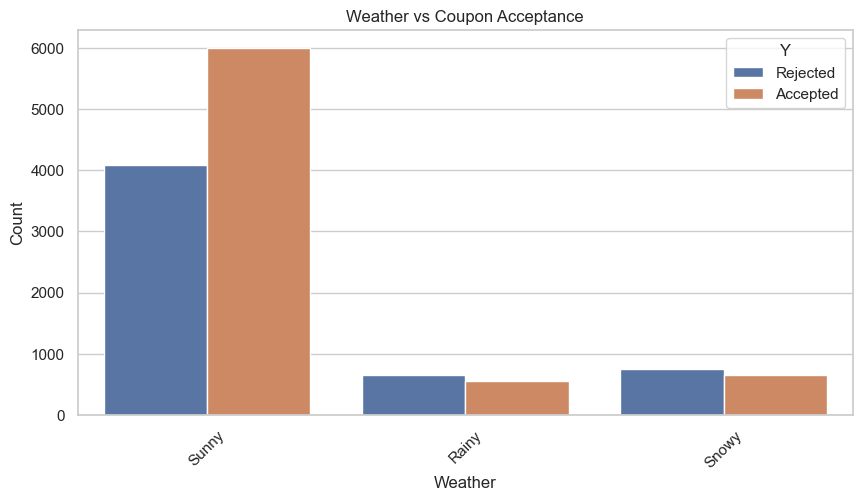

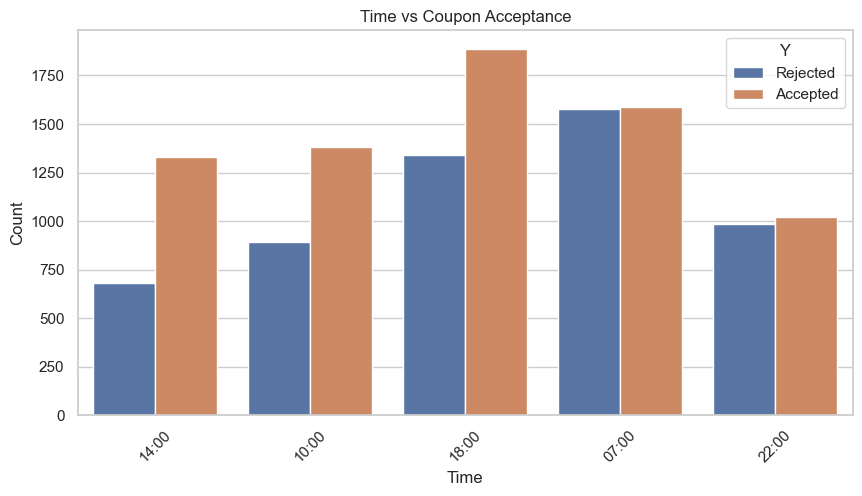

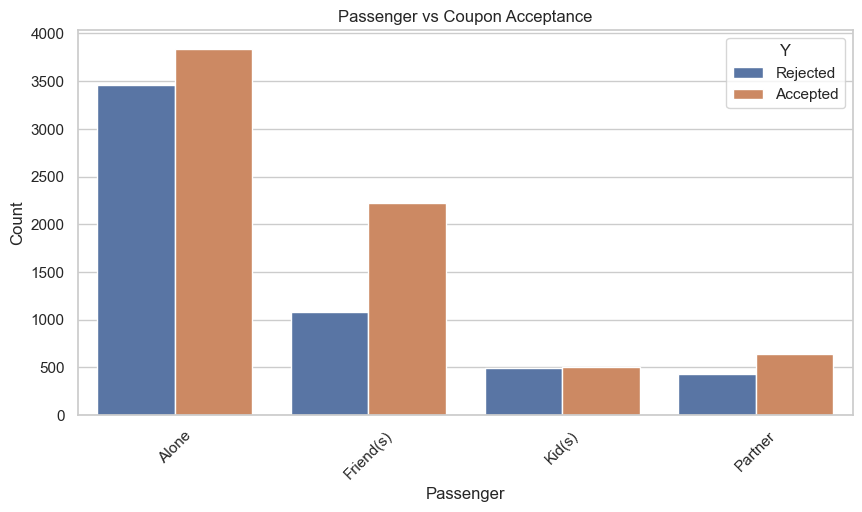

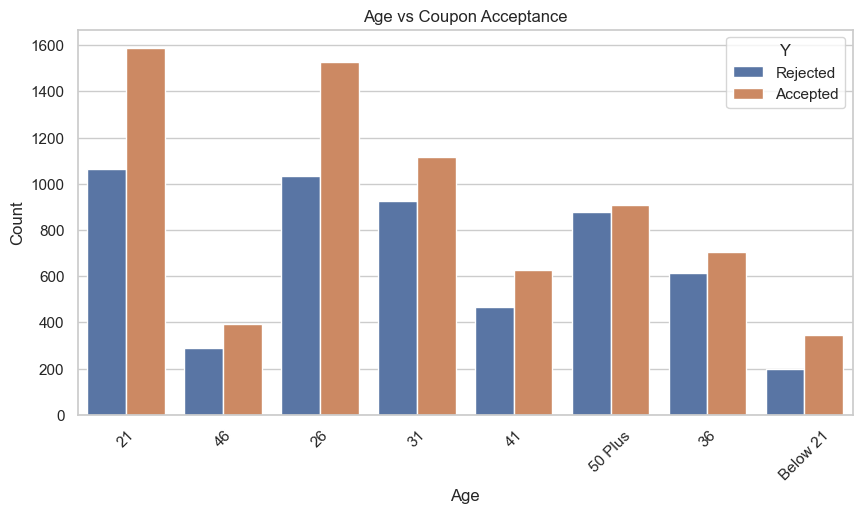

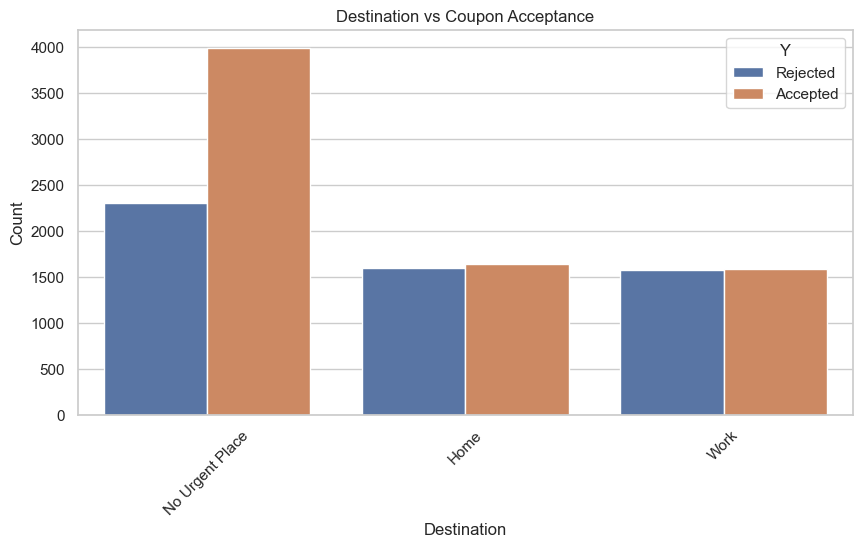

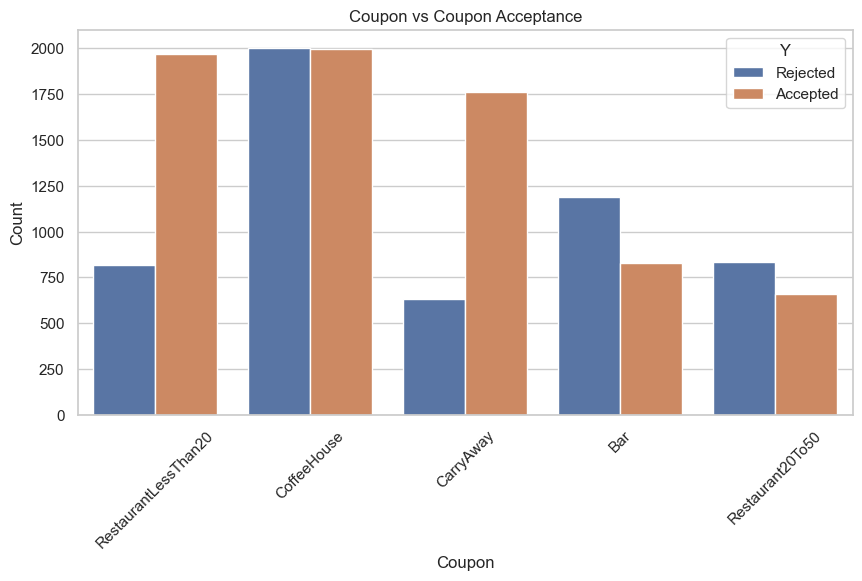

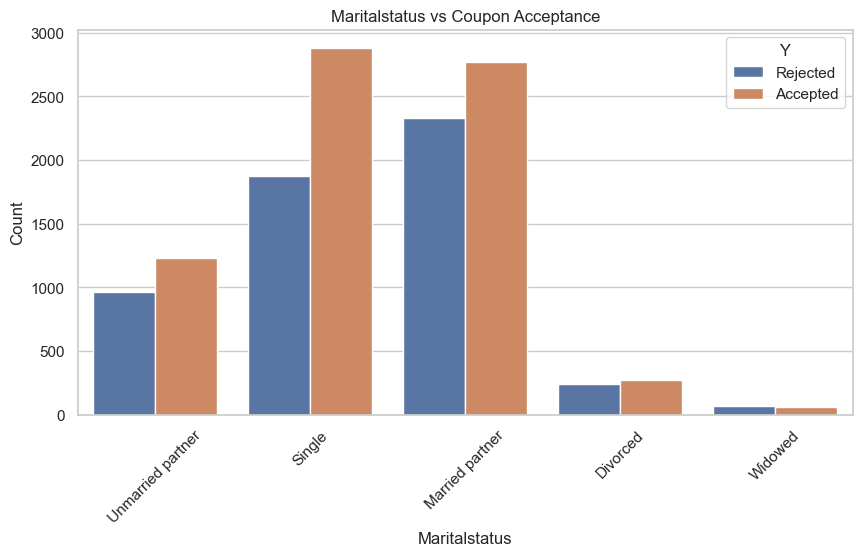

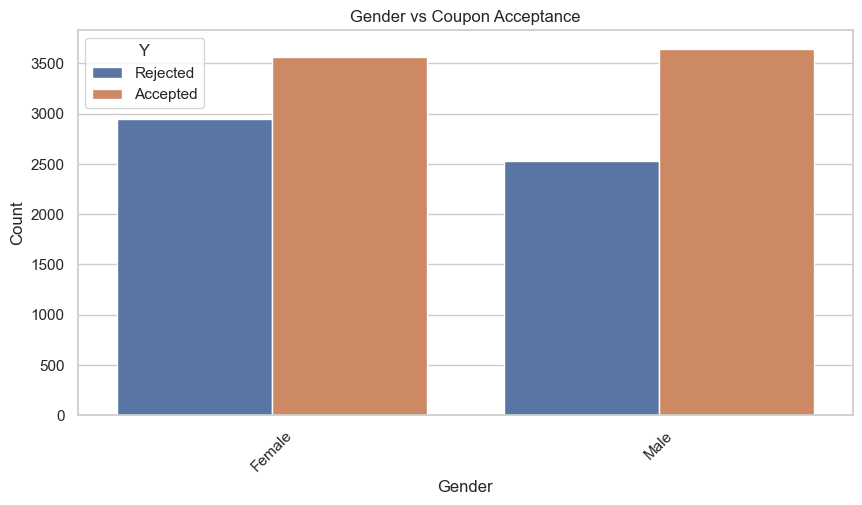

In [399]:
columns_to_visualize = ['weather', 'time', 'passenger', 'age', 'destination', 'coupon', 'maritalStatus', 'gender']
for column in columns_to_visualize:
    plt.figure(figsize = (10, 5))
    sns.countplot(data = data, x = column, hue = 'Y')
    sns.set(style = 'whitegrid')
    plt.title(f"{column.capitalize()} vs Coupon Acceptance")
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation = 45)
    plt.legend(title = 'Y', labels = ['Rejected', 'Accepted'])
    plt.show()


## *Preparing the Cleaned Dataset for Modeling*

In [411]:
data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,No Urgent Place,Alone,Sunny,55,14:00,RestaurantLessThan20,1d,Female,21,Unmarried partner,...,never,never,4-8,4-8,1-3,1,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10:00,CoffeeHouse,2h,Female,21,Unmarried partner,...,never,never,4-8,4-8,1-3,1,0,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10:00,CarryAway,2h,Female,21,Unmarried partner,...,never,never,4-8,4-8,1-3,1,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,14:00,CoffeeHouse,2h,Female,21,Unmarried partner,...,never,never,4-8,4-8,1-3,1,1,0,0,0
4,No Urgent Place,Friend(s),Sunny,80,14:00,CoffeeHouse,1d,Female,21,Unmarried partner,...,never,never,4-8,4-8,1-3,1,1,0,0,0


In [430]:
# Split into train and test sets
X = data.drop("Y", axis = 1)
y = data["Y"]

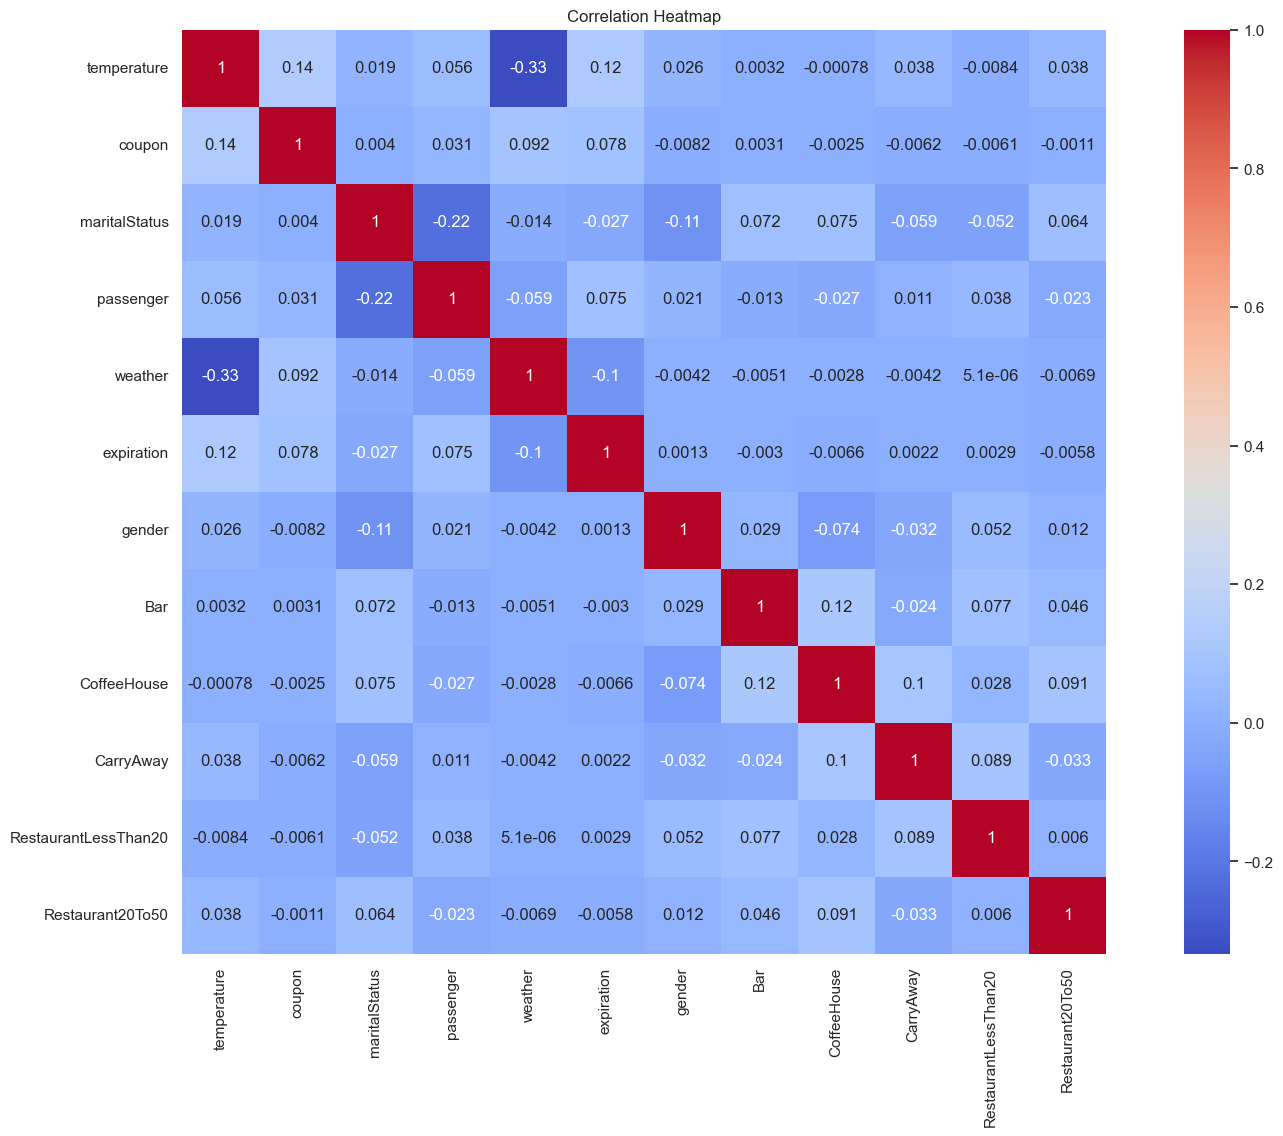

In [431]:
# Convert categorical variables into numerical format
column_names = ['Bar', 'CoffeeHouse', 'CarryAway',
                     'RestaurantLessThan20', 'Restaurant20To50']
for column in column_names:
    X[column] = X[column].map({'Less than 1': 0, 'Greater than 8': 1, '1-3': 2, '4-8': 3, 'never': 4})
X['coupon'] = X['coupon'].map({'CarryAway': 0, 'Bar': 1, 'CoffeeHouse': 2,
                                     'RestaurantLessThan20': 3, 'Restaurant20To50': 4})
X["gender"] = X["gender"].map({'Male': 0, 'Female': 1})
X["expiration"] = X["expiration"].map({'1d': 0, '2h': 1})
X['weather'] = X['weather'].map({'Rainy': 0, 'Sunny': 1, 'Snowy': 2})
X['destination'] = X['destination'].map({'Home': 0, 'Work': 1, 'No Urgent Place': 2})
X['passenger'] = X['passenger'].map({'Alone': 0, 'Friend(s)': 1, 'Kid(s)': 2, 'Partner': 3})
X['maritalStatus'] = X['maritalStatus'].map({'Divored': 0, 'Married partner': 1, 'Unmarried partner': 2, 'Single': 3, 'Widowed': 4})

# Correlation heatmap for numerical variables
numerical_columns = ['temperature', 'coupon', 'maritalStatus', 'passenger', 'weather', 'expiration',
                     'gender', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
plt.figure(figsize = (20, 12))
sns.heatmap(X[numerical_columns].corr(), annot = True, cmap = 'coolwarm', square = True)
plt.title('Correlation Heatmap')
plt.show()

cat_features = ['education', 'occupation', 'income', 'time', 'age']
num_features = ['temperature', 'maritalStatus']
encoder = OneHotEncoder()
scaler = StandardScaler()
transformer = ColumnTransformer([('cat', encoder, cat_features),
                                 ('num', scaler, num_features)],
                                 remainder = 'passthrough')
X = transformer.fit_transform(X)
X = pd.DataFrame(X)


In [432]:
X

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,4.0,4.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,4.0,4.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,4.0,4.0,3.0,3.0,2.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,4.0,4.0,3.0,3.0,2.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,4.0,4.0,3.0,3.0,2.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,4.0,2.0,3.0,2.0,1.0,0.0,0.0,1.0
12680,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,4.0,2.0,3.0,2.0,1.0,0.0,0.0,0.0
12681,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,4.0,2.0,3.0,2.0,1.0,0.0,0.0,1.0
12682,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,4.0,2.0,3.0,2.0,1.0,1.0,1.0,0.0


# *Training Different Models with the Cleaned and Standardized Dataset*

## *1.   Logistic Regression*

In [433]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Logistic Regression
log_reg = LogisticRegression(max_iter = 1000, random_state = 42)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

# Evaluate Logistic Regression
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_precision = precision_score(y_test, log_reg_pred)
log_reg_recall = recall_score(y_test, log_reg_pred)
log_reg_f1 = f1_score(y_test, log_reg_pred)

print("Performance of Logistic Regression:")
print(f"Accuracy: {log_reg_accuracy:.2f}")
print(f"Precision: {log_reg_precision:.2f}")
print(f"Recall: {log_reg_recall:.2f}")
print(f"F1-Score: {log_reg_f1:.2f}")
print("-" * 40)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## *2. Decision Tree Classifier*

In [369]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

# Evaluate Decision Tree Classifier
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

print("Performance of Decision Tree Classifier:")
print(f"Accuracy: {dt_accuracy:.2f}")
print(f"Precision: {dt_precision:.2f}")
print(f"Recall: {dt_recall:.2f}")
print(f"F1-Score: {dt_f1:.2f}")
print("-" * 40)


Performance of Decision Tree Classifier:
Accuracy: 0.70
Precision: 0.73
Recall: 0.76
F1-Score: 0.75
----------------------------------------


## *3. Random Forest Classifier*

In [370]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

# Evaluate Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print("Performance of Random Forest Classifier:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1-Score: {rf_f1:.2f}")
print("-" * 40)


Performance of Random Forest Classifier:
Accuracy: 0.74
Precision: 0.75
Recall: 0.84
F1-Score: 0.79
----------------------------------------


## *Comparing the Models to Determine Which one Performed Better...*

In [444]:
import pandas as pd

# Store results
results = {
    f"Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    f"Accuracy": [log_reg_accuracy * 100, dt_accuracy * 100, rf_accuracy * 100],
    f"Precision": [log_reg_precision * 100, dt_precision * 100, rf_precision * 100],
    f"Recall": [log_reg_recall * 100, dt_recall * 100, rf_recall * 100],
    f"F1-Score": [log_reg_f1 * 100, dt_f1 * 100, rf_f1 * 100],
}

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df.round(2)


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,62.24,62.61,80.06,70.27
1,Decision Tree,70.32,73.35,76.01,74.65
2,Random Forest,73.95,74.76,83.50,78.89


In [446]:
results_df.round(2).to_csv("Results.csv")

## The Random Forest Classifier had the best metrics scores compared to the others, therefore, It will go through a phase of `Hyper-Parameters Fine-Tuning`.

## *Fine-Tuning the Random Forest Model*

In [141]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],                # Number of trees
    'max_depth': [10, 15, 20, None],              # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],              # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],                # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2', None],       # Number of features to consider for best split
    'criterion': ['gini', 'entropy'],             # Function to measure the quality of a split
    'class_weight': [None, 'balanced'],           # Handling class imbalance
    'bootstrap': [True, False],                   # Whether to bootstrap samples
}

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state = 42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator = rf_clf,
    param_grid = param_grid,
    cv = 3,                   # 3-fold cross-validation
    scoring = 'f1',           # Use F1-score for evaluation
    verbose = 2,              # Print progress during the search
    n_jobs = -1               # Use all available cores
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Fitting 3 folds for each of 5184 candidates, totalling 15552 fits
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_feat

## *Making use of the Best Hyper-Parameters*

In [358]:

rf_clf = RandomForestClassifier(
                                n_estimators = 500,
                                max_depth = 15,
                                bootstrap = False,
                                class_weight = None,
                                criterion = 'entropy',
                                max_features = 'log2',
                                min_samples_leaf = 2,
                                min_samples_split = 4,
                                random_state = 42,
                                )

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

# Evaluate Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print("Performance of Random Forest Classifier:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1-Score: {rf_f1}")
print("-" * 40)


Performance of Random Forest Classifier:
Accuracy: 0.7248718959400867
Precision: 0.7229129662522202
Recall: 0.8414886285320469
F1-Score: 0.7777070063694268
----------------------------------------


In [359]:
y_pred = rf_clf.predict(X_test)
print("Sample predictions on the last fold test set:", y_pred)

Sample predictions on the last fold test set: [1 0 1 ... 1 1 1]


In [360]:
new_data = pd.DataFrame(y_pred)

In [361]:
new_data

,0
0,1
1,0
2,1
3,0
4,0
...,...
2532,1
2533,0
2534,1
2535,1
